<a href="https://colab.research.google.com/github/Niveditha-K17/BHDetection_GlobularClusters/blob/main/MassOfMostMassiveBH_Predictionv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data = pd.read_csv("simulations.csv")
data

,Galactocentric Raidus,Cluster Metallicity,Number of Objects in the Cluster,Cluster Mass,Observational Core Radius,Observational Half-Light Radius,Central Surface Brightness Total,Binary Fraction,Half-Mass Relaxation Time,Total Luminosity of Cluster at 12 Gyrs,...,Half-light radius obtained from King 62 fitting,Total luminosity from snap-2D,Single Black Holes,Binary Black Holes,Black Hole Other Count,Mass of Most Massive Black Hole,Fallback Enabled,Central Velocity Dispersion,Unnamed: 22,Unnamed: 23
0,4.483209,0.001,38920,23593.2395,0.381992,3.413317,109.654400,0.399229,885.619718,20229.8993,...,3.85929,14969.5,0,1,0,21.994084,0,1.94718,575.27,792.36
1,4.483209,0.001,505043,164640.2310,0.368883,2.491200,34827.624400,0.099239,3460.547220,77000.7159,...,2.54377,55168.4,1,0,0,5871.062390,0,10.15090,6338.30,22914.00
2,4.483209,0.001,479417,158782.2470,0.053349,1.930993,100139.011000,0.130133,2958.528450,73983.4991,...,2.03162,54178.7,1,0,0,5.907700,1,5.44959,171360.00,93731.00
3,4.483209,0.001,504171,173094.5800,0.239726,2.193033,13710.088900,0.184856,3949.593890,85496.8882,...,2.42598,61475.5,0,0,1,17.542009,0,4.87986,22645.00,35459.00
4,4.483209,0.001,501245,172722.6840,0.458644,2.537746,2589.006420,0.192672,4089.662060,78996.9967,...,2.64693,58285.7,3,1,0,12.388086,1,4.49099,7351.00,12222.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,8.961667,0.001,430575,153829.5090,8.186195,11.196129,124.013015,0.084009,17004.436600,87728.4511,...,12.88920,59061.0,421,5,5,26.195472,1,3.74500,114.81,818.16
1292,8.961667,0.001,1148111,378797.8470,0.363009,4.047745,121091.456000,0.049244,7780.207680,208888.6760,...,4.21363,148172.0,1,0,0,8141.942800,0,9.27809,10004.00,27489.00
1293,8.961667,0.001,1121134,376044.7900,0.276965,5.093038,50124.732700,0.050766,8518.287010,205882.5110,...,5.49906,143544.0,5,0,0,14571.972300,1,12.35760,11224.00,25443.00
1294,8.961667,0.001,1124046,372312.7040,0.876489,6.211617,7679.070830,0.059884,13372.708500,206975.9980,...,6.75933,144985.0,2,0,0,4528.488600,0,7.20535,4501.60,15058.00


In [4]:
data.rename(columns = {'Number of Objects in the Cluster':'#Objects in Cluster',
                       'Observational Core Radius':'Ob Core Radius',
                       'Observational Half-Light Radius':'Ob Half-Light Radius',
                       'Central Surface Brightness Total':'CS Brightness',
                       'Half-Mass Relaxation Time':'HM Rel Time',
                       'Total Luminosity of Cluster at 12 Gyrs':'TLC at 12 Gyrs',
                       'Central surface brightness from King 62 fitting of cumulative luminosity profile from snap-2D.dat':'CS Brightness from K62',
                       'Core radius obtained from King 62 fitting of snap-2D.dat':'Core Radius from K62',
                       'Half-light radius obtained from King 62 fitting':'Half Radius from K62',
                       'Mass of Most Massive Black Hole':'Mass of Most Massive BH'
                      }, inplace = True)

In [5]:
data = data.iloc[:,:-2]
data

,Galactocentric Raidus,Cluster Metallicity,#Objects in Cluster,Cluster Mass,Ob Core Radius,Ob Half-Light Radius,CS Brightness,Binary Fraction,HM Rel Time,TLC at 12 Gyrs,...,CS Brightness from K62,Core Radius from K62,Half Radius from K62,Total luminosity from snap-2D,Single Black Holes,Binary Black Holes,Black Hole Other Count,Mass of Most Massive BH,Fallback Enabled,Central Velocity Dispersion
0,4.483209,0.001,38920,23593.2395,0.381992,3.413317,109.654400,0.399229,885.619718,20229.8993,...,423.668974,1.781371,3.85929,14969.5,0,1,0,21.994084,0,1.94718
1,4.483209,0.001,505043,164640.2310,0.368883,2.491200,34827.624400,0.099239,3460.547220,77000.7159,...,4073.650913,1.031188,2.54377,55168.4,1,0,0,5871.062390,0,10.15090
2,4.483209,0.001,479417,158782.2470,0.053349,1.930993,100139.011000,0.130133,2958.528450,73983.4991,...,24778.675830,0.298724,2.03162,54178.7,1,0,0,5.907700,1,5.44959
3,4.483209,0.001,504171,173094.5800,0.239726,2.193033,13710.088900,0.184856,3949.593890,85496.8882,...,14689.387400,0.435038,2.42598,61475.5,0,0,1,17.542009,0,4.87986
4,4.483209,0.001,501245,172722.6840,0.458644,2.537746,2589.006420,0.192672,4089.662060,78996.9967,...,6212.542260,0.757504,2.64693,58285.7,3,1,0,12.388086,1,4.49099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,8.961667,0.001,430575,153829.5090,8.186195,11.196129,124.013015,0.084009,17004.436600,87728.4511,...,111.583976,8.542639,12.88920,59061.0,421,5,5,26.195472,1,3.74500
1292,8.961667,0.001,1148111,378797.8470,0.363009,4.047745,121091.456000,0.049244,7780.207680,208888.6760,...,4941.017507,1.497158,4.21363,148172.0,1,0,0,8141.942800,0,9.27809
1293,8.961667,0.001,1121134,376044.7900,0.276965,5.093038,50124.732700,0.050766,8518.287010,205882.5110,...,4136.404926,1.325894,5.49906,143544.0,5,0,0,14571.972300,1,12.35760
1294,8.961667,0.001,1124046,372312.7040,0.876489,6.211617,7679.070830,0.059884,13372.708500,206975.9980,...,3122.623280,1.524092,6.75933,144985.0,2,0,0,4528.488600,0,7.20535


In [6]:
data.describe()

,Galactocentric Raidus,Cluster Metallicity,#Objects in Cluster,Cluster Mass,Ob Core Radius,Ob Half-Light Radius,CS Brightness,Binary Fraction,HM Rel Time,TLC at 12 Gyrs,...,CS Brightness from K62,Core Radius from K62,Half Radius from K62,Total luminosity from snap-2D,Single Black Holes,Binary Black Holes,Black Hole Other Count,Mass of Most Massive BH,Fallback Enabled,Central Velocity Dispersion
count,1296.000000,1296.000000,1.296000e+03,1296.000000,1296.000000,1296.000000,1.296000e+03,1296.000000,1.296000e+03,1289.000000,...,1296.000000,1.296000e+03,1.296000e+03,1296.000000,1296.000000,1296.000000,1296.00000,1296.000000,1296.000000,1296.000000
mean,13.795005,0.006824,3.549600e+05,124605.085965,1.175493,3.704930,5.129919e+04,0.147552,4.190883e+03,63793.263548,...,6085.613178,9.802004e+03,5.625000e+07,43774.503267,18.920525,0.597222,0.68287,2912.647015,0.493827,6.753591
std,13.747224,0.007798,4.107997e+05,133588.167728,1.996293,2.602061,4.030985e+05,0.112824,3.942686e+03,66876.963919,...,17501.728564,3.379408e+05,2.025000e+09,46748.321403,72.820628,1.651897,1.48263,5930.501850,0.500155,8.186834
min,0.806069,0.000200,1.680000e+02,202.439378,0.012096,0.369331,1.585988e-01,0.016670,3.410000e-07,42.222069,...,0.000000,-7.107496e+06,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.448899
25%,3.397451,0.001000,4.108925e+04,16928.510175,0.152169,1.986873,2.541000e+02,0.066921,1.250035e+03,8950.770620,...,391.335568,4.870860e-01,2.082772e+00,5499.190000,0.000000,0.000000,0.00000,0.000000,0.000000,1.430718
50%,9.609443,0.005000,1.324815e+05,59840.253600,0.368593,2.816936,1.387919e+03,0.095694,3.285283e+03,34385.710800,...,1787.208036,7.587923e-01,2.909625e+00,23659.050000,0.000000,0.000000,0.00000,13.090620,0.000000,3.803875
75%,17.415375,0.006000,5.778370e+05,201688.128500,1.157344,4.678259,1.270077e+04,0.229543,5.381429e+03,104769.469000,...,6039.537321,1.458730e+00,4.965393e+00,71851.200000,1.000000,0.000000,1.00000,2795.206837,1.000000,8.015273
max,49.995444,0.020000,1.966209e+06,624852.378000,12.913423,17.135980,1.060000e+07,0.726190,2.368620e+04,305503.452000,...,413419.000000,6.931186e+06,7.290000e+10,208648.000000,789.000000,15.000000,15.00000,43030.183000,1.000000,51.384800


In [7]:
data.isnull().sum()

Galactocentric Raidus             0
Cluster Metallicity               0
#Objects in Cluster               0
Cluster Mass                      0
Ob Core Radius                    0
Ob Half-Light Radius              0
CS Brightness                     0
Binary Fraction                   0
HM Rel Time                       0
TLC at 12 Gyrs                    7
Central Velocity Dispersion 3d    0
Total V-band luminosity           0
CS Brightness from K62            0
Core Radius from K62              0
Half Radius from K62              0
Total luminosity from snap-2D     0
Single Black Holes                0
Binary Black Holes                0
Black Hole Other Count            0
Mass of Most Massive BH           0
Fallback Enabled                  0
Central Velocity Dispersion       0
dtype: int64

## Determining most important features

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt


YData = data['Mass of Most Massive BH']
XData = data.drop(['Mass of Most Massive BH','TLC at 12 Gyrs'], axis=1)
model = ExtraTreesRegressor()
model.fit(XData,YData)

ExtraTreesRegressor()

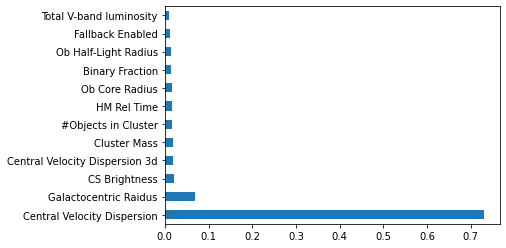

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=XData.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

## Splitting data into train and test dataset

In [10]:
# XData = XData.filter(['CS Brightness from K62','CS Brightness','Core radius from K62','Cluster Mass','#Objects in Cluster','Central Velocity Dispersion 3d',
#               'Ob Half-Light Radius','Binary Fraction','Total luminosity from snap-2D','Total V-band luminosity','Ob Core Radius','HM Rel Time',
#               'Galactocentric Radius','Half Radius from K62'],axis=1)
print(XData)
XData = np.array(XData)
YData = np.array(YData).reshape(-1,1)
XData, YData

      Galactocentric Raidus  Cluster Metallicity  #Objects in Cluster  \
0                  4.483209                0.001                38920   
1                  4.483209                0.001               505043   
2                  4.483209                0.001               479417   
3                  4.483209                0.001               504171   
4                  4.483209                0.001               501245   
...                     ...                  ...                  ...   
1291               8.961667                0.001               430575   
1292               8.961667                0.001              1148111   
1293               8.961667                0.001              1121134   
1294               8.961667                0.001              1124046   
1295               8.961667                0.001              1060404   

      Cluster Mass  Ob Core Radius  Ob Half-Light Radius  CS Brightness  \
0       23593.2395        0.381992              

(array([[4.48320946e+00, 1.00000000e-03, 3.89200000e+04, ...,
         0.00000000e+00, 0.00000000e+00, 1.94718000e+00],
        [4.48320946e+00, 1.00000000e-03, 5.05043000e+05, ...,
         0.00000000e+00, 0.00000000e+00, 1.01509000e+01],
        [4.48320946e+00, 1.00000000e-03, 4.79417000e+05, ...,
         0.00000000e+00, 1.00000000e+00, 5.44959000e+00],
        ...,
        [8.96166740e+00, 1.00000000e-03, 1.12113400e+06, ...,
         0.00000000e+00, 1.00000000e+00, 1.23576000e+01],
        [8.96166740e+00, 1.00000000e-03, 1.12404600e+06, ...,
         0.00000000e+00, 0.00000000e+00, 7.20535000e+00],
        [8.96166740e+00, 1.00000000e-03, 1.06040400e+06, ...,
         1.00000000e+00, 1.00000000e+00, 5.35266000e+00]]),
 array([[2.19940839e+01],
        [5.87106239e+03],
        [5.90770021e+00],
        ...,
        [1.45719723e+04],
        [4.52848860e+03],
        [2.48386276e+01]]))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train, X_test, Y_train, Y_test = train_test_split(XData, YData, test_size = 0.25)
scaler_x.fit(X_train)
X_train_scaled = scaler_x.transform(X_train)
scaler_x.fit(X_test)
X_test_scaled = scaler_x.transform(X_test)
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
# scaler_y.fit(Y_train)
# Y_train_scaled = scaler_y.transform(Y_train)
# scaler_y.fit(Y_test)
# Y_test_scaled = scaler_y.transform(Y_test)

X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((972, 20), (972, 1), (324, 20), (324, 1))

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=6)
scores 


array([-1.02996126e+16,  8.82801480e-01,  8.70485859e-01,  8.55708334e-01,
        8.47447125e-01, -1.20788328e+07])

In [15]:
lin_reg.fit(X_train_scaled,Y_train)
y_pred_l = lin_reg.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_l))

R2_score: -6381844199.879742


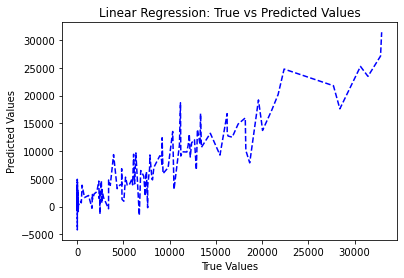

In [17]:
lin_reg.fit(X_train_scaled, Y_train)
y_pred_l = lin_reg.predict(X_test_scaled)

# Sort the indices based on Y_test values
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_l[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
  
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_l)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_l) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_l,squared=False)
mape = mean_absolute_percentage_error(y_true=Y_test,y_pred=y_pred_l)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1616.9088704588596
MSE: 5500765.094446848
RMSE: 2345.370992923475


## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=25, random_state=0,n_estimators = 80,max_features="auto")
scores = cross_val_score(regr, X_train, Y_train, scoring='r2', cv=6)
scores

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

array([0.9098648 , 0.93652692, 0.91317562, 0.91588759, 0.92269265,
       0.90933789])

In [20]:
regr.fit(X_train, Y_train)
y_pred_rf = regr.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_rf))

C:\Users\mihir\AppData\Local\Temp/ipykernel_11436/3387164560.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, Y_train)


R2_score: 0.9501958390631063


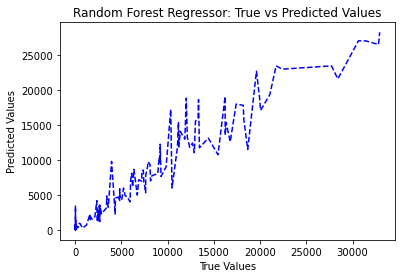

In [21]:
# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_rf[sorted_indices], color='b',linestyle='--',label='Random Forest Regrssor')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: True vs Predicted Values")
plt.show()


In [22]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_rf)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_rf) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_rf,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 582.4508531980911
MSE: 1925539.3608943669
RMSE: 1387.6380511121647


### Hyperparamter tuning with RandomSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [31]:
regr_best = RandomForestRegressor(n_estimators= 400,min_samples_split= 10,
 min_samples_leaf=1,
 max_features='sqrt',
  max_depth= 60,
 bootstrap=False)
scores = cross_val_score(regr_best, X_train, Y_train, scoring='r2', cv=6)
scores

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

array([0.86604329, 0.92824124, 0.93413526, 0.89948854, 0.95539444,
       0.90225195])

In [32]:
regr_best.fit(X_train, Y_train)
y_pred_rf_best = regr_best.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_rf_best))

C:\Users\mihir\AppData\Local\Temp/ipykernel_11436/416916181.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_best.fit(X_train, Y_train)


R2_score: 0.9413491098368038


C:\Users\mihir\AppData\Local\Temp/ipykernel_11436/2310391034.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_best.fit(X_train, Y_train)


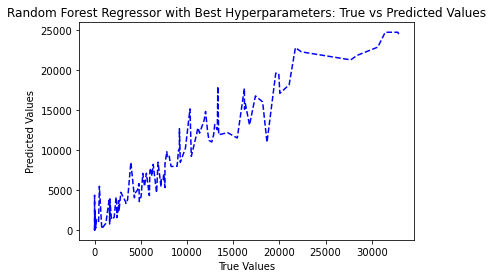

In [33]:
regr_best.fit(X_train, Y_train)

# Predict on the test set
y_pred_rf_best = regr_best.predict(X_test)

# Sort the indices based on Y_test values
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_rf_best[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor with Best Hyperparameters: True vs Predicted Values")
plt.show()

In [34]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_rf_best)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_rf_best) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_rf_best,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 655.4374780854134
MSE: 2224310.949410761
RMSE: 1491.4124008505364


## LASSO Regression

In [35]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.02)
scores = cross_val_score(lasso, X_train, Y_train, scoring='r2', cv=6)
scores

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746702132.2790413, tolerance: 2701407.420377075
  model = cd_fast.enet_coordinate_descent(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1696326451.0579703, tolerance: 2760830.2365901773
  model = cd_fast.enet_coordinate_descent(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1648094410.0016375, tolerance: 2733362.093879178
  model = cd_fast.enet_coordinate_descent(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

array([-1.03235144e+16,  8.82903872e-01,  8.70468434e-01,  8.55775181e-01,
        8.47482535e-01,  8.35149946e-01])

In [36]:
lasso.fit(X_train,Y_train)
y_pred_lr = lasso.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_lr))

R2_score: 0.8741180598274019


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2006305377.52177, tolerance: 3301600.631975298
  model = cd_fast.enet_coordinate_descent(


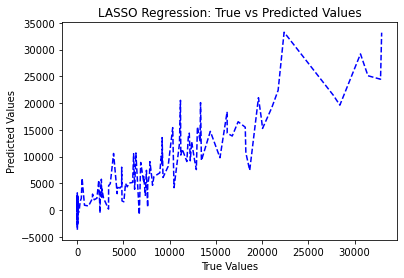

In [37]:
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_lr[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("LASSO Regression: True vs Predicted Values")
plt.show()


In [38]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_lr)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_lr) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_lr,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1346.843589946206
MSE: 4866875.097749732
RMSE: 2206.099521270455


## XGBoost Regressor

In [32]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 70, seed = 123)
scores = cross_val_score(xgb_r, X_train, Y_train, scoring='r2', cv=6)
scores

[06:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.91449447, 0.92933618, 0.9243512 , 0.95743335, 0.92710892,
       0.92075686])

In [33]:
xgb_r.fit(X_train, Y_train)
y_pred_xg = xgb_r.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_xg))

[06:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_score: 0.9467272465720852


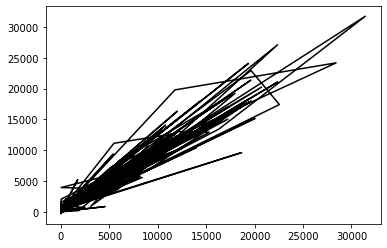

In [34]:

plt.plot(Y_test[sorted_indices], y_pred_xg[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regressor: True vs Predicted Values")
plt.show()

In [35]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_xg)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_xg) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_xg,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 632.0587720740677
MSE: 1820972.1476259313
RMSE: 1349.4340101042108


### Hyperparameter tuning with RandomSearchCV

In [36]:
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [37]:
rs_model=RandomizedSearchCV(xgb_r,param_distributions=params,n_iter=10,scoring='r2',n_jobs=-1,cv=5,verbose=3)

In [38]:
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[06:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(n_estimators=70, seed=123),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [39]:
rs_model.best_estimator_


XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=8,
             min_child_weight=7, n_estimators=70, seed=123)

In [40]:
xgb_r_best = xg.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=8,
             min_child_weight=7, n_estimators=70, seed=123)
scores = cross_val_score(xgb_r_best, X_train, Y_train, scoring='r2', cv=6)
scores

[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.91368678, 0.95094208, 0.92511793, 0.96141835, 0.95307003,
       0.91249687])

In [41]:
xgb_r_best.fit(X_train, Y_train)
y_pred_xg_best = xgb_r_best.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_xg_best))

[06:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_score: 0.9530222083484091


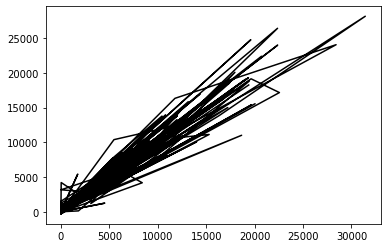

In [42]:
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_xg_best[sorted_indices], color='k')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regressor with Best Hyperparameters: True vs Predicted Values")
plt.show()

In [43]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_xg_best)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_xg_best) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_xg_best,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 569.4075346545341
MSE: 1605797.42269705
RMSE: 1267.2006244857403


## KNN Regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=1)
scores = cross_val_score(knn_regressor, X_train, Y_train, scoring='r2', cv=6)
scores


array([0.7368488 , 0.5806903 , 0.41851272, 0.68293942, 0.38660291,
       0.60605369])

In [45]:
knn_regressor.fit(X_train, Y_train)
y_pred_knn = knn_regressor.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_knn))

R2_score: 0.7247375640718599


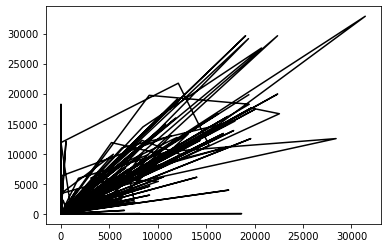

In [46]:
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_knn[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor: True vs Predicted Values")
plt.show()

In [47]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_knn)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_knn) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_knn,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1197.3252456689506
MSE: 9409035.517397515
RMSE: 3067.415119835839


### Hyperparameter tuning

In [48]:
knn_accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_score=cross_val_score(knn,X_train,Y_train,cv=10,scoring="r2")
    knn_accuracy_rate.append(knn_score.mean())



Text(0, 0.5, 'Accuracy Rate')

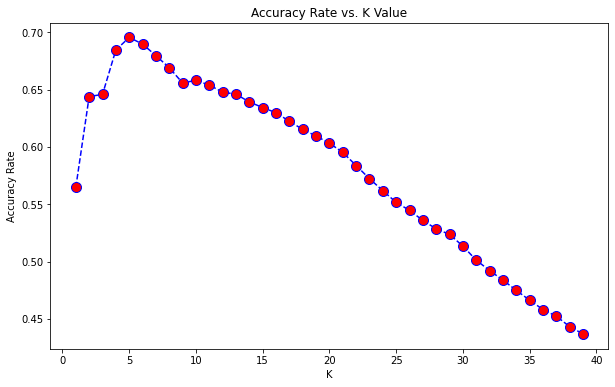

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),knn_accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [50]:
knn_regressor_best=KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn_regressor_best, X_train, Y_train, scoring='r2', cv=6)
scores

array([0.7296375 , 0.74065879, 0.49974291, 0.73073508, 0.76184407,
       0.7039041 ])

In [51]:
knn_regressor_best.fit(X_train, Y_train)
y_pred_knn_best = knn_regressor_best.predict(X_test)
print("R2_score:",r2_score(Y_test,y_pred_knn_best))

R2_score: 0.7561271094980493


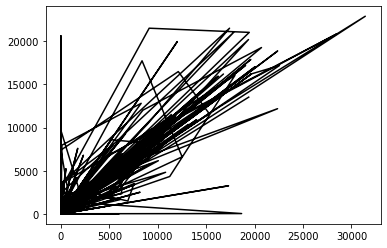

In [52]:
sorted_indices = np.argsort(Y_test.flatten())

# Plot the organized graph
plt.plot(Y_test[sorted_indices], y_pred_knn_best[sorted_indices], color='b',linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor with Best K Value: True vs Predicted Values")
plt.show()

In [53]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_knn_best)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_knn_best) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_knn_best,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1256.4227977125372
MSE: 8336076.372812012
RMSE: 2887.2264152317553


## PSO Regression


In [54]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

YData = data['Binary Black Holes']
XData = data.drop(['Binary Black Holes','TLC at 12 Gyrs'], axis=1)
X = XData.values
y= YData.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
X.shape, y.shape


((1296, 20), (1296,))

In [56]:
class SIregression:
  def __init__(self,num_particles=10,learning_rate=0.0003,batch_size=10,epoch=10,inertia = 0.9, c1 = 0.5, c2 = 0.4):
    self.lr_init = learning_rate
    self.batch_size = batch_size
    self.num_particles = num_particles
    self.trained_weights = None
    self.epoch = epoch
    self.c2 = c2
    self.c1 = c1
    self.inertia = inertia

  def split(self,data):
    # one can override this function build custom data spliter (for temporal data)
    split_percentage = 1
    # returns training data,validation data
    return data[:int(data.shape[0]*split_percentage)],data[int(data.shape[0]*(split_percentage)):] 

  def loss_func(self,target,values):
    # one can overrided this function to create a custome lossfunction
    return np.sum((target-values)**2)/target.shape[0]

  def exp_decay(self,loss):
    # learning rate will decay with respect to the loss
    k = 0.3
    lrate = self.lr_init * np.exp(k*(loss-self.thresh))
    return lrate

  def velocity_update(self,v1,pbest,gbest,present):
    #updating the velocity using the formula
    # logistic equation of chaos as r > 4 
    self.inertia = 4*self.inertia*(1-self.inertia)
    return self.inertia*v1 + self.c1*np.random.rand()*(pbest-present)+self.c2*np.random.rand()*(gbest-present)
  def fit(self,X,y):
    # initializing starting position, velocity, particles best values
    particles=[]
    best_loss = 0
    global_best = None
    # adding one for the bias term
    X = np.append(X,np.ones(shape = (X.shape[0],1)),axis=1)

    for particle in norm.rvs(scale = 5, size = (self.num_particles , X.shape[1])):
      particles.append({'values':particle,
                        'velocity':np.random.randn(X.shape[1]),
                        'present_best': particle})
      
      if len(particles) == 1:
        global_best = particle
        best_loss = self.loss_func(y[:self.batch_size],np.array([np.sum(particle*x) for x in X[:self.batch_size]]))
      else:
        current_loss = self.loss_func(y[:self.batch_size],np.array([np.sum(particle*x) for x in X[:self.batch_size]]))
        if current_loss<best_loss:
          global_best = particle
          best_loss = current_loss
    particles = np.array(particles)

    #algorithm
    ep = 0
    loss = 9999
    while self.epoch>ep:
      train_data,val_data = self.split(np.append(X,np.vstack(y),axis=1))
      previous_loss = self.loss_func(train_data[:,-1],np.array([np.sum(global_best*x) for x in train_data[:,:-1]]))
      for i,particle in enumerate(particles):
        # print(particle.values)
        particles[i]['velocity'] = self.velocity_update(particle['velocity'],global_best,particle['present_best'],particles[i]['values'])
        
        # updating the position
        particles[i]['values'] = particles[i]['values'] + particles[i]['velocity']

        # updating present best and global best
        present_loss = self.loss_func(train_data[:,-1],np.array([np.sum(particles[i]['values']*x) for x in train_data[:,:-1]]))
        present_best_loss = self.loss_func(train_data[:,-1],np.array([np.sum(particles[i]['present_best']*x) for x in train_data[:,:-1]]))
        global_best_loss = self.loss_func(train_data[:,-1],np.array([np.sum(global_best*x) for x in train_data[:,:-1]]))
        
        if present_loss < present_best_loss:
          particles[i]['present_best'] = particles[i]['values']
        if present_best_loss < global_best_loss:
          global_best = particles[i]['present_best']
        
      loss = self.loss_func(train_data[:,-1],np.array([np.sum(global_best*x) for x in train_data[:,:-1]]))
      # mutation for local minima purpose
      if int(previous_loss) == int(loss):
        for i,_ in enumerate(particles):
          # shift the point by a randnom distance which decreases as the iterations reaches end
          particles[i]['values'] = particles[i]['values'] + norm.rvs(scale =(self.epoch-ep)/self.epoch if (self.epoch-ep)/self.epoch > 0.2 else 0.2 ,size=(len(particles[i]['values'])))
      
      print("training loss {} of epoch {}".format(loss,ep+1))
      ep = ep+1
    
    print(global_best.shape)
    self.trained_weights = global_best
    return self.trained_weights
  def predict(self,X):
    # adding one for the bias term
    print(X.shape)
    X = np.append(X,np.ones(shape = (X.shape[0],1)),axis=1)
    return np.array([np.sum(self.trained_weights*x) for x in X[:,:]])

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [58]:
model = SIregression(num_particles=70,epoch=50)
model.fit(X_train,Y_train)


training loss 72.44917966648268 of epoch 1
training loss 72.44917966648268 of epoch 2
training loss 53.145620406880475 of epoch 3
training loss 36.729514871235175 of epoch 4
training loss 36.17890778077808 of epoch 5
training loss 32.55877311631977 of epoch 6
training loss 22.98965044504006 of epoch 7
training loss 22.98965044504006 of epoch 8
training loss 16.39169262660934 of epoch 9
training loss 13.591019272294744 of epoch 10
training loss 11.364046163966458 of epoch 11
training loss 10.493819464832788 of epoch 12
training loss 6.884916539302601 of epoch 13
training loss 6.884916539302601 of epoch 14
training loss 4.966623801847381 of epoch 15
training loss 4.131046775152338 of epoch 16
training loss 4.131046775152338 of epoch 17
training loss 4.131046775152338 of epoch 18
training loss 3.9570009471453194 of epoch 19
training loss 3.356967503166726 of epoch 20
training loss 2.8434415669401534 of epoch 21
training loss 2.8434415669401534 of epoch 22
training loss 2.47151568148378 of

array([-0.23752821, -0.30775507,  1.5357322 , -0.88492778,  0.12006681,
       -0.04900832, -0.03553589, -0.22316294,  0.39117994, -0.15943374,
        1.84178788,  0.11839945, -0.14557139, -0.23960675, -2.58087546,
        0.73422447,  0.44731187,  0.052728  ,  0.25839068, -0.0432341 ,
        0.66040327])

In [59]:
y_pred_pso = model.predict(X_test)

(324, 20)


In [60]:
print(model.loss_func(Y_test,y_pred_pso))

1.8738935668369736


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_pso)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_pso) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_pso,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.7632910846335177
MSE: 1.8738935668369736
RMSE: 1.3689023218758063


In [62]:
from sklearn.metrics import r2_score
print("R2_score",r2_score(Y_test,y_pred_pso))

R2_score 0.2078052027776084


## Comparing with SLR model

In [63]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X_train,Y_train)
y_pred = mod.predict(X_test)
print(model.loss_func(Y_test,y_pred))

3964239.7907203296


In [64]:
mod.coef_

array([-3.38508025e-02, -9.72599625e-02, -8.89574344e-01,  7.93595589e-01,
        2.13948188e-01, -1.77146058e-01,  2.35791043e-02, -4.23841787e-02,
        3.23450370e-01, -1.30767331e-02, -8.32286553e+03, -2.57053284e-01,
       -4.69499104e-02,  5.56182031e+02,  8.28516084e+03,  6.63580405e-01,
        3.42430746e-01, -2.93106233e-01,  3.17036439e-01,  1.62056844e-01])

In [65]:
model.trained_weights


array([-0.23752821, -0.30775507,  1.5357322 , -0.88492778,  0.12006681,
       -0.04900832, -0.03553589, -0.22316294,  0.39117994, -0.15943374,
        1.84178788,  0.11839945, -0.14557139, -0.23960675, -2.58087546,
        0.73422447,  0.44731187,  0.052728  ,  0.25839068, -0.0432341 ,
        0.66040327])

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 111.18089875250936
MSE: 3964239.7907203296
RMSE: 1991.0398767278193


In [67]:
print("R2_score",r2_score(Y_test,y_pred))

R2_score -1675894.6819791691
